In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('bestsellers_with_categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape

(550, 7)

In [4]:
print("Про скільки книг зберігає дані датасет?")
print(f"{df['Name'].nunique()}")  # nunique()-> counts the number of unique values directly 

Про скільки книг зберігає дані датасет?
351


In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
for column in df.columns:
    nan_values = df[column].isna().sum()
    if nan_values > 0:
        print(f"{column}: {nan_values}")

In [7]:
print(f"Чи є в якихось змінних пропуски? {nan_values} (ні)")

Чи є в якихось змінних пропуски? 0 (ні)


In [8]:
print("Які є унікальні жанри?")
df['genre'].unique()

Які є унікальні жанри?


array(['Non Fiction', 'Fiction'], dtype=object)

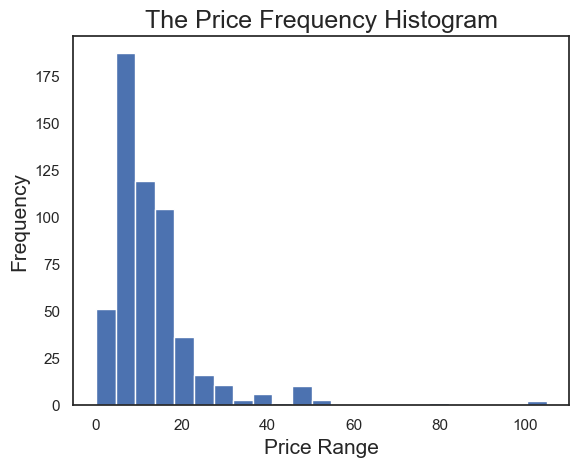

In [82]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set_theme(style="white")

price_hist = df['price'].plot(kind='hist', bins=int(np.sqrt(550)))
plt.xlabel("Price Range", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("The Price Frequency Histogram", fontsize=18)
plt.show()

In [10]:
print("Максимальна ціна?")
print(df['price'].max())

Максимальна ціна?
105


In [11]:
print("Мінімальна ціна?")
print(df['price'].min())

Мінімальна ціна?
0


In [12]:
print("Середня ціна?")
print(df['price'].mean())

Середня ціна?
13.1


In [13]:
print("Медіанна ціна?")
print(df['price'].median())

Медіанна ціна?
11.0


In [14]:
print("Який рейтинг у датасеті найвищий?")
print(df['user_rating'].max())

Який рейтинг у датасеті найвищий?
4.9


In [15]:
print("Скільки книг мають такий рейтинг?")
print(df[df['user_rating'] == 4.9]['name'].count())

Скільки книг мають такий рейтинг?
52


C:\Users\renat\AppData\Local\Temp\ipykernel_60428\1289381909.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(user_ratings, shade=True, color="blue", alpha=0.5)


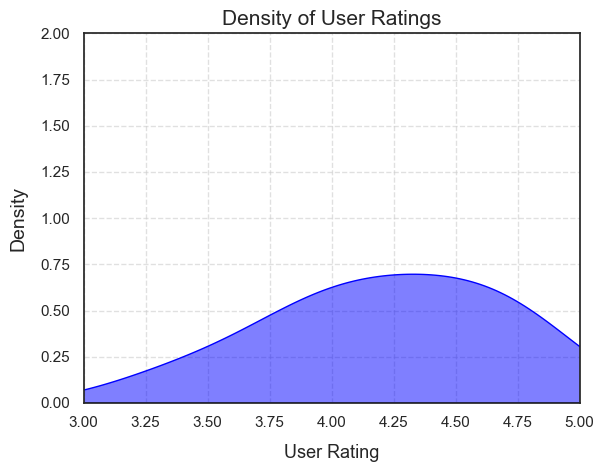

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

user_ratings = df['user_rating'].unique()

sns.kdeplot(user_ratings, shade=True, color="blue", alpha=0.5)

plt.title("Density of User Ratings", fontsize=15)
plt.xlabel("User Rating", fontsize=13, labelpad=10)
plt.ylabel("Density", fontsize=14, labelpad=9)

plt.xlim(3, 5)
plt.ylim(0, 2)

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [16]:
print("Яка книга має найбільше відгуків?")
print(df[df['reviews'] == df['reviews'].max()]['name'].values[0])

Яка книга має найбільше відгуків?
Where the Crawdads Sing


In [17]:
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?")
df_2015 = df[df['year'] == 2015]
#df_2015[df_2015['user_rating'] == df_2015['user_rating'].max()]
print(df_2015[df_2015['price'] == df_2015['price'].max()]['name'].values[0])

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Publication Manual of the American Psychological Association, 6th Edition


In [18]:
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?")
print(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].nlargest(50, 'price')['name'].count())

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
20


In [19]:
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?")
print(df[(df['user_rating']== 4.9) & (df['year'].isin([2010,2011]))]['name'].count())

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
1


In [20]:
df_2015_sorted = df_2015[df_2015['price'] < 8].sort_values(by='price',ascending=True)
df_2015_sorted

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


C:\Users\renat\AppData\Local\Temp\ipykernel_60428\3115571301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author', y='price', data=avg_price, palette='dark')


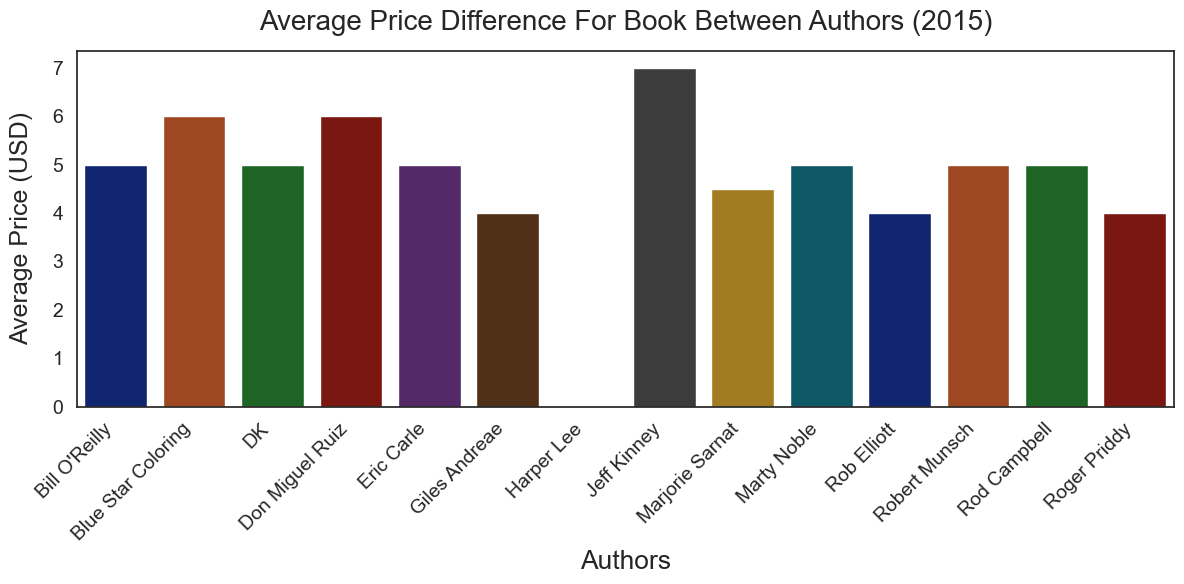

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price = df_2015_sorted.groupby('author')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='author', y='price', data=avg_price, palette='dark')

plt.title('Average Price Difference For Book Between Authors (2015)', fontsize=20, pad=15)
plt.xlabel('Authors', fontsize=19)
plt.ylabel('Average Price (USD)', fontsize=18, labelpad=14)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
print("Яка книга остання у відсортованому списку?")
print(df_2015_sorted.iloc[-1].values[0])

Яка книга остання у відсортованому списку?
Old School (Diary of a Wimpy Kid #10)


In [22]:
df_filtered = df.groupby('genre')['price'].agg(min_price = 'min', max_price = 'max')
df_filtered

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105


In [23]:
print(f"Максимальна ціна для жанру Fiction: {df_filtered.loc['Fiction','max_price']}")

Максимальна ціна для жанру Fiction: 82


In [24]:
print(f"Мінімальна ціна для жанру Fiction: {df_filtered.loc['Fiction','min_price']}")

Мінімальна ціна для жанру Fiction: 0


In [25]:
print(f"Максимальна ціна для жанру Non Fiction: {df_filtered.loc['Non Fiction','max_price']}")

Максимальна ціна для жанру Non Fiction: 105


In [26]:
print(f"Мінімальна ціна для жанру Non Fiction: {df_filtered.loc['Non Fiction','min_price']}")

Мінімальна ціна для жанру Non Fiction: 0


In [27]:
df_authors = df.groupby('author').agg(books = ('name','count'))
df_authors.head()

,books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


In [28]:
df_authors = df_authors.reset_index()
df_authors.head()

,author,books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1


In [29]:
print(f"Якої розмірності вийшла таблиця? {df_authors.shape}")

Якої розмірності вийшла таблиця? (248, 2)


In [30]:
print("Який автор має найбільше книг?")
print(df_authors[df_authors['books'] == df_authors['books'].max()]['author'].values[0])

Який автор має найбільше книг?
Jeff Kinney


In [31]:
print("Скільки книг цього автора?")
print(df_authors[df_authors['books'] == df_authors['books'].max()]['books'].values[0])

Скільки книг цього автора?
12


In [32]:
df_ratings = df.groupby('author')['user_rating'].agg(avg_rating = 'mean')
df_ratings.head()

,avg_rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


In [33]:
df_ratings = df_ratings.reset_index()

In [34]:
print("У якого автора середній рейтинг мінімальний?")
print(df_ratings[df_ratings['avg_rating'] == df_ratings['avg_rating'].min()]['author'].values[0])

У якого автора середній рейтинг мінімальний?
Donna Tartt


In [35]:
print("Який у цього автора середній рейтинг?")
print(df_ratings[df_ratings['avg_rating'] == df_ratings['avg_rating'].min()]['avg_rating'].values[0])

Який у цього автора середній рейтинг?
3.9


In [36]:
df_authors = df_authors.set_index('author')
df_ratings = df_ratings.set_index('author')

In [37]:
df_new = pd.concat([df_authors, df_ratings], axis=1)
df_new.head()

,books,avg_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


In [38]:
df_new = df_new.reset_index()

In [39]:
df_new.head()

,author,books,avg_rating
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


In [40]:
df_new = df_new.sort_values(by='books', ascending=True)

In [41]:
df_new.head()

,author,books,avg_rating
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7
6,Alan Moore,1,4.8


In [42]:
print("Який автор перший у списку?")
print(df_new['author'].values[0])

Який автор перший у списку?
Adam Gasiewski
